## Introducing earthkit

**earthkit** is an **open-source** Python project led by ECMWF, providing powerful tools for speeding up weather and climate science workflows by simplifying **data access**, **processing**, **analysis**, **visualisation** and more.

**earthkit** lowers the barrier to entry for interacting with climate data in Python by providing high-level, easy-to-use functions for performing common data analysis and visualisation tasks. Designed to be **format-agnostic**, **earthkit** allows you to focus on working with whatever data you have without worrying about technical issues like data formats.

**earthkit** is currently in the *alpha* stage of development, but is already available in GitHub, PyPI and conda as an open-source project than can be installed, played with and contributed to. **earthkit** will become the recommended library for retrieving, analysing and visualising CDS and ADS data when it releases in 2024, replacing the legacy *CDS Toolbox*.

These notebooks provide an introduction to using earthkit as a one-stop-shop for speeding up your workflows for interacting with CDS data.

To get started, import the `earthkit` module.

In [1]:
import earthkit as ek

### Retrieving data from the CDS

The core function we will be using for retrieving and opening data is `ek.data.from_source`. You can use this function to open data from many different sources, such as URLs, local files, and of course the CDS.

To access data from the CDS source, we need to pass `"cds"` as the first argument to `ek.data.from_source`. The other arguments are exactly the same arguments expected by the CDS API - that is, the name of the dataset followed by the request payload. If you're familiar with the **CDS API**, you'll already be acquainted with the syntax for these requests.

In the following example, we will retrieve data from the CDS dataset [ERA5 monthly averaged data on single levels from 1940 to present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form). We will access monthly-averaged 2m temperature for the month of September 2022:

In [3]:
DOWNLOAD_FROM_CDS = False
# Directory where any local data is stored
LOCAL_DATA_DIR = "../test_data/"

if DOWNLOAD_FROM_CDS:
    data = ek.data.from_source(
        "cds",
        "reanalysis-era5-single-levels-monthly-means",
        {
            "product_type": "monthly_averaged_reanalysis",
            "variable": "2m_temperature",
            "year": "2022",
            "month": "09",
            "time": "00:00",
        },
    )
    # Save to a file
    data.save(f"{LOCAL_DATA_DIR}/era5-temperature-sep-2022.grib")
else:
    data = ek.data.from_source("file", f"{LOCAL_DATA_DIR}/era5-temperature-sep-2022.grib")

FileNotFoundError: [Errno 2] No such file or directory: '../test_data//era5-temperature-sep-2022.grib'

One advantage of **earthkit** over the legacy CDS API is that local downloads and caching are automatically handled for you. That means that you don't need to save your request to a specific file and then read that file into Python - it's all handled in one step. By default, files will be removed from your local cache after a few days - so you don't even need to worry about cleaning up files you no longer need, as they will be automatically housekept!

Note that we didn't include a `format` key in our request payload, even though ERA5 can be retrieved in either GRIB or netCDF format. **earthkit** is designed to be **format agnostic** - that is, earthkit tools should work in exactly the same way whether you have GRIB data *or* netCDF data, so we can comfortably exclude the data format from our request and accept the default selection made by the CDS.

The `data` object that has been returned from our CDS request is a special kind of **earthkit** object, providing a range of convenient methods for interrogating a data source or converting it to a format that's familiar to you, such as xarray, numpy or pandas - or saving to a local file.

In [ ]:
# Convert to an xarray Dataset object
data.to_xarray()

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 721,
                 longitude: 1440)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2022-09-01
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-07T09:33 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
# Convert to a pandas dataframe
# Note: this is usually a bad idea with gridded data!
data.to_pandas()

,lat,lon,value,datetime,domain,levtype,date,param,class,type,stream,expver
0,90.0,0.00,268.062668,2022-09-01,g,sfc,20220901,2t,ea,an,moda,0001
1,90.0,0.25,268.062668,2022-09-01,g,sfc,20220901,2t,ea,an,moda,0001
2,90.0,0.50,268.062668,2022-09-01,g,sfc,20220901,2t,ea,an,moda,0001
3,90.0,0.75,268.062668,2022-09-01,g,sfc,20220901,2t,ea,an,moda,0001
4,90.0,1.00,268.062668,2022-09-01,g,sfc,20220901,2t,ea,an,moda,0001
...,...,...,...,...,...,...,...,...,...,...,...,...
1038235,-90.0,358.75,218.578293,2022-09-01,g,sfc,20220901,2t,ea,an,moda,0001
1038236,-90.0,359.00,218.578293,2022-09-01,g,sfc,20220901,2t,ea,an,moda,0001
1038237,-90.0,359.25,218.578293,2022-09-01,g,sfc,20220901,2t,ea,an,moda,0001
1038238,-90.0,359.50,218.578293,2022-09-01,g,sfc,20220901,2t,ea,an,moda,0001


In [ ]:
# Convert to a numpy array
data.to_numpy()

array([[[268.06266785, 268.06266785, 268.06266785, ..., 268.06266785,
         268.06266785, 268.06266785],
        [268.0118866 , 268.0118866 , 268.0118866 , ..., 268.0118866 ,
         268.0118866 , 268.0118866 ],
        [268.00212097, 268.00212097, 268.0040741 , ..., 268.00212097,
         268.00212097, 268.00212097],
        ...,
        [218.5665741 , 218.56852722, 218.57048035, ..., 218.56266785,
         218.5665741 , 218.5665741 ],
        [218.79704285, 218.79899597, 218.8009491 , ..., 218.7931366 ,
         218.7931366 , 218.79508972],
        [218.57829285, 218.57829285, 218.57829285, ..., 218.57829285,
         218.57829285, 218.57829285]]])

### Quick visualisation with **earthkit-maps**

So far we have have been making use of **earthkit-data** (`ek.data`) - one of many sub-components of **earthkit** - designed for accessing and reading data from a variety of sources.

Now we can make use of **earthkit**'s geospatial visualisation component: **earthkit-maps** (`ek.maps`). **earthkit-maps** offers convenient methods for very quickly producing high-quality graphics from geospatial data, while also providing the flexibility to tailor visualisations to specific needs.

The fastest way to get started with **earthkit-maps** is to use the `ek.maps.quickplot` function to provide a quick look at the data we just downloaded from the CDS. With `quickplot`, the colour scale, data units, title and map projection will be automatically detected from the metadata of the data we are plotting, so we don't need to provide anything more than the data we would like to visualise:

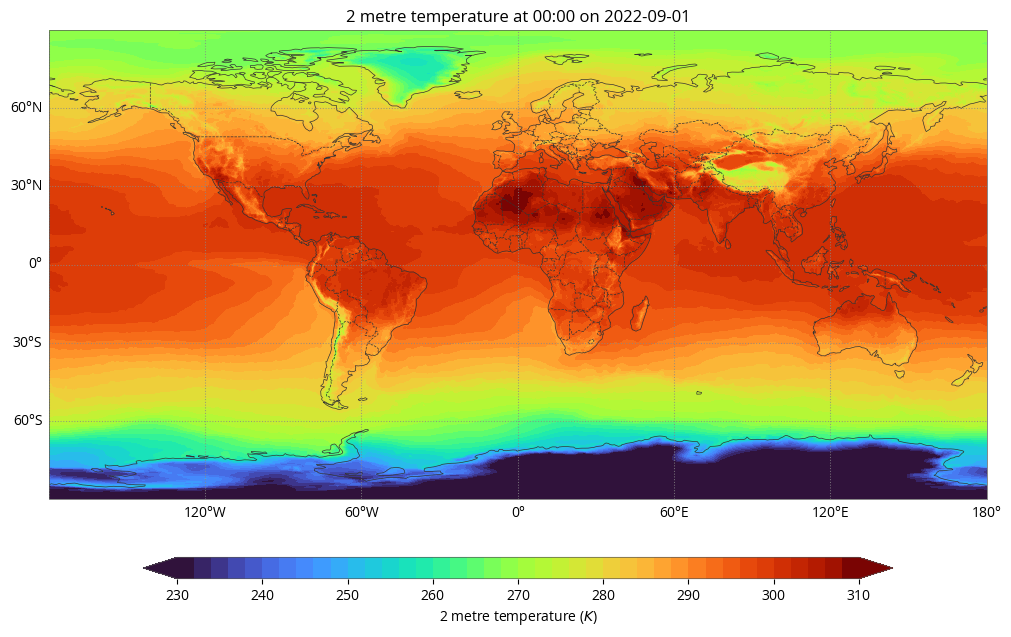

In [ ]:
ek.maps.quickplot(data)

This is a great way to take a quick look at the data, but what if we want to tailor the visualisation to more specific needs?

Let's say we would like to visualise the same data:
- over a European domain
- with units of *degrees celsius* instead of *Kelvin*
- with a more informative title

**earthkit-maps** provides plenty of freedom to customise our plot, with a simple API filled with convenient templates. Instead of using the `ek.maps.quickplot` method, we need to create an `ek.maps.Superplot` object, which is the canvas onto which we will plot our data. The other steps in our visualisation are explained in in-line comments in the code cell below:

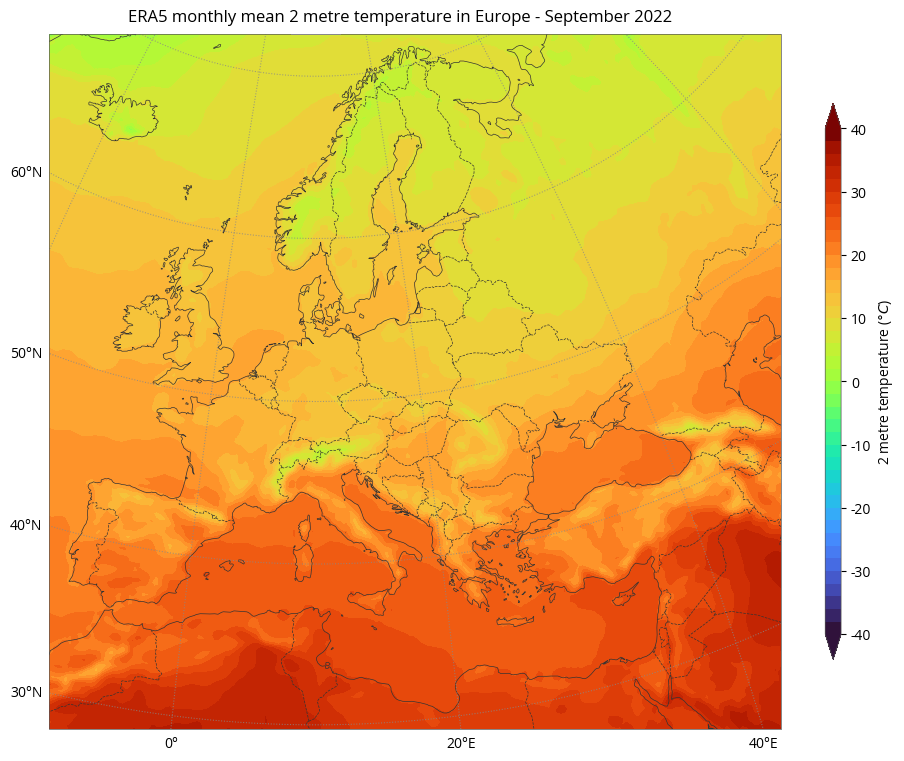

In [ ]:
# Instantiate a Superplot object with the domain set to "Europe"
# earthkit-maps allows named domains based on many presets, including
# continents, countries and more - so feel free to experiment with domains!
chart = ek.maps.Superplot(domain="Europe")

# chart.plot will attempt to find a suitable style for the data based
# on its metadata - usually the name of the variable we're plotting.
# We can also specifically tailor the style to use some units of choice,
# in this case celsius - but this depends on a corresponding pre-configured
#style existing within earthkit-maps.
# In the next notebook we will explore how to create custom styles.
chart.plot(data, units="celsius")

# The API for adding auxilliary layers is very straightforward
chart.coastlines()
chart.borders()
chart.gridlines()

# Titles can include template keys between curely brackets, which are
# extracted from the data's metadata. This makes it much easier to transfer
# code between projects, without having to completely re-write titles
chart.title("ERA5 monthly mean {variable_name} in {domain} - {time:%B %Y}")
chart.legend(location="right")

chart.show()

Now try experimenting with the cell above by changing the domain and units. Notice that the title and legend automatically update to reflect your choices!

### Conclusion

In this notebook we have learnt how to retrieve data from the CDS and produce simple visualisations with **earthkit**. In the next example, we will learn how to further customise **earthkit-maps** visualisations on a few different kinds of datasets.